In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
x = tf.constant(2, name='x')
y = tf.constant(3, name='y')
op1 = tf.add(x,y, name='add')
with tf.Session() as s:
    writer = tf.summary.FileWriter('./graphs', s.graph)
    print(s.run(op1))
writer.close()
#tensorboard --logdir="./graphs" --port 6006

5


In [13]:
tf.InteractiveSession()
a = tf.constant([2,1], shape=[3,3], verify_shape=False).eval() #default is false
print(a)
tf.InteractiveSession().close()

[[2 1 1]
 [1 1 1]
 [1 1 1]]


In [19]:
tf.InteractiveSession()
a = tf.constant([[2,2]], name='a')
b = tf.constant([[0,1],[2,3]], name='b')
x = tf.add(a,b, name='x')
print(x.eval())
y = tf.multiply(a,b, name='y')
print(y.eval())
z = tf.matmul(a,b, name='z')
print(z.eval())
zeros = tf.zeros_like(b) #ones_like exists too
print(zeros.eval())
fill = tf.fill([3,3],3) #ones_like exists too
print(fill.eval())
tf.InteractiveSession().close()

[[2 3]
 [4 5]]
[[0 2]
 [4 6]]
[[4 8]]
[[0 0]
 [0 0]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]


In [22]:
tf.InteractiveSession()
lin = tf.linspace(10.0,13.00,4, name='linspace') #always float
print(lin.eval())
r = tf.range(3,limit=18, delta=1,  name='range') #can change dtype. default delta is 1, limit exclusive
print(r.eval())

[10. 11. 12. 13.]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [30]:
# truncated normal is always within 2 std dev from mean, or else reselected
tf.random_normal([2,2], mean=0, stddev=1.0).eval()
tf.random_uniform([2,2], minval=0, maxval=20).eval()
tf.random_shuffle([[1,2],[3,4]]).eval()
tf.random_crop([[1,2],[3,4]], size=[2,1]).eval()
b = tf.constant(np.random.normal(size=(3,4)))
print(b.eval())
tf.multinomial(b, 5).eval()

[[ 0.53673228 -2.38274671 -1.09179315  0.48616493]
 [ 0.45241419  0.01698201  0.25022675  0.98730542]
 [-1.37969009  1.08125506  1.91467914  0.34018974]]


array([[3, 3, 0, 0, 3],
       [3, 2, 3, 1, 0],
       [2, 2, 1, 2, 2]], dtype=int64)

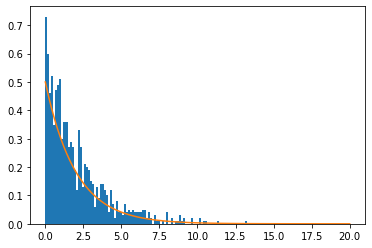

In [82]:
x = tf.random_gamma([1000], 1,.5).eval()
import matplotlib.pyplot as plt
import scipy.stats as stats
t = np.linspace(0,20,100)
plt.hist(x, bins=100, weights = np.full((1000), 1/100))
y = stats.gamma.pdf(t, a=1, scale=2)
plt.plot(t,y)
plt.show()

In [94]:
a = tf.constant([2,2], name='a')
b = tf.constant([3,6], name='b')
tf.add(a,b).eval()
tf.add_n([a,b,a]).eval()
tf.multiply(b,a).eval()
tf.matmul(tf.reshape(b, [1,2]), tf.reshape(a, [2,1])).eval()
tf.div(b,a).eval()
tf.divide(b,a).eval()
tf.mod(b,a).eval()


array([1, 0])

In [95]:
l = ['a','b','c']
tf.zeros_like(l).eval()

array([b'', b'', b''], dtype=object)

In [97]:
tf.ones_like(l).eval() #error

TypeError: Expected string, got 1 of type 'int' instead.

In [99]:
a = tf.constant([2,2], name='a')
b = tf.constant([3,6], name='b')

with tf.Session() as s:
    graph  = s.graph.as_graph_def
    print(graph)

<bound method Graph.as_graph_def of <tensorflow.python.framework.ops.Graph object at 0x000001BF5D1B29C8>>


In [122]:
#Variables! - constant is op, Variable is class
a = tf.Variable([3,6], name='a')
assign = a.assign([3,3])
#init vars ALL AT ONCE - YOU NEED TO INIT!
init = tf.global_variables_initializer()
#init SOME vars
init_a = tf.variables_initializer([a], name='init_a')
with tf.Session() as sess:
    sess.run(assign) # assign inits for you
    #sess.run(a.initializer)
    print(a.eval())


[3 3]


In [127]:
a = tf.Variable(6, name='a')
mul_2 = a.assign(a*2)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(a.initializer) # needs this 
    sess.run(mul_2) 
    sess.run(mul_2)
    print(a.eval())

24


In [146]:
p = tf.Variable(2)
q = tf.Variable(2*p) 
sess = tf.InteractiveSession()
sess.run(q.initializer)
print(q.eval())

4


In [145]:
W = tf.Variable(2)
#U = tf.Variable(2*W) but W might not be initialized
U = tf.Variable(2*W.initialized_value())
sess = tf.InteractiveSession()
sess.run(U.initializer)
print(U.eval())

4


In [3]:
a = tf.placeholder(tf.float32, shape=None,name='a') #if shape=None, can be any shape
b = tf.constant([5,5,5], tf.float32)
c = a+b
with tf.Session() as sess:
    print(sess.run(c, feed_dict={a:[1,2,3]}))

[6. 7. 8.]


In [5]:
a = tf.add(2,5)
b = tf.multiply(a,3)

with tf.Session() as s:
    print(s.run(b, feed_dict={a:15})) #can override a even if its not a placeholder!

45


In [17]:
x = tf.Variable(10, name='x')
y = tf.Variable(10, name='y')
z = tf.add(x,y)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./g1', session.graph)
    for _ in range(10):
        session.run(z)
    writer.close()                                                     

In [15]:
x = tf.Variable(10, name='x')
y = tf.Variable(10, name='y')

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./g2', s.graph)
    for _ in range(10):
        s.run(tf.add(x,y))
    writer.close()

In [12]:
x = [[1.,2.],[5.,10.],[3.,4.]]
y = tf.nn.softmax(x)


with tf.Session() as sess:
    print(sess.run(y))

[[0.26894143 0.7310586 ]
 [0.00669285 0.9933072 ]
 [0.26894143 0.7310586 ]]


In [16]:
def softmax(x):
    e_x = np.exp(x) 
    return e_x / e_x.sum(axis=-1, keepdims=True)

print(softmax(x))

[[0.26894142 0.73105858]
 [0.00669285 0.99330715]
 [0.26894142 0.73105858]]


In [30]:
y = tf.Variable([.3,.7])
y_hat = tf.Variable([.4,.6])
mul = y * tf.log(y_hat)
loss = tf.reduce_mean(-tf.reduce_sum(mul))

with tf.Session() as sess:
    print(sess.run(loss))


FailedPreconditionError: Attempting to use uninitialized value Variable_19
	 [[node Variable_19/read (defined at <ipython-input-30-888257c72dd7>:1) ]]

Original stack trace for 'Variable_19/read':
  File "C:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Anaconda3\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\Anaconda3\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-888257c72dd7>", line 1, in <module>
    y = tf.Variable([.3,.7])
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 258, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 219, in _variable_v1_call
    shape=shape)
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 197, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variable_scope.py", line 2612, in default_variable_creator
    shape=shape)
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 262, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 1684, in __init__
    shape=shape)
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\ops\variables.py", line 1872, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 267, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 3829, in identity
    "Identity", input=input, name=name)
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 742, in _apply_op_helper
    attrs=attr_protos, op_def=op_def)
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3322, in _create_op_internal
    op_def=op_def)
  File "C:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1756, in __init__
    self._traceback = tf_stack.extract_stack()
